# Método de Newton-Raphson

O método de Newton-Raphson é um dos métodos numéricos mais eficientes para encontrar raízes de funções. Ele utiliza a derivada da função para encontrar aproximações sucessivas da raiz.

In [1]:
import sys
import os

# Obtém o caminho absoluto do diretório do notebook
notebook_dir = os.path.abspath('')

# Adiciona o diretório pai ao sys.path para reconhecer "Graph"
sys.path.append(os.path.join(notebook_dir, '..'))

import numpy as np
import sympy as sp
from tabulate import tabulate
from Graph.graph import plotar_funcao

In [2]:
def newton_raphson(f, df, x0, tol):
    """
    Implementa o método de Newton-Raphson para encontrar a raiz de uma função.

    Parâmetros:
    f  -- Função contínua
    df -- Derivada da função
    x0 -- Aproximação inicial
    tol -- Tolerância para o erro

    Retorna:
    raiz aproximada e tabela com as iterações
    """
    tabela = []
    erro_absoluto = None
    erro_relativo = None

    while True:
        fx0 = f(x0)
        dfx0 = df(x0)

        if abs(dfx0) < 1e-12:  # Evita divisão por zero
            raise ValueError("Erro: Derivada próxima de zero, método pode não convergir.")

        x1 = x0 - fx0 / dfx0
        erro_absoluto = abs(f(x1))
        erro_relativo = abs((x1 - x0) / x1) if x1 != 0 else float('inf')

        tabela.append([x0, fx0, dfx0, x1, erro_absoluto, erro_relativo])

        if erro_absoluto <= tol:
            return x1, tabela

        x0 = x1  # Atualiza para a próxima iteraçã

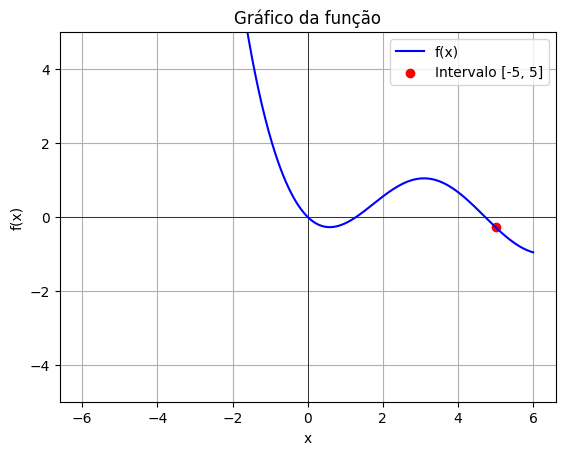

    x0    f(x0)    f'(x0)      x1    Erro Absoluto    Erro Relativo
------  -------  --------  ------  ---------------  ---------------
1.0000  -0.1724    0.4736  1.3641           0.0504           0.2669
1.3641   0.0504    0.7231  1.2944           0.0012           0.0538
1.2944   0.0012    0.6880  1.2927           0.0000           0.0013
Raiz aproximada: 1.2927


In [3]:
# Definição da função pelo usuário
x = sp.Symbol('x')
expressao = input("Digite a função em termos de x (ex: sin(x) + exp(x)): ")
funcao_simbolica = sp.sympify(expressao)

# Calcula a derivada da função
derivada_simbolica = sp.diff(funcao_simbolica, x)

# Converte para funções numéricas
funcao = sp.lambdify(x, funcao_simbolica, 'numpy')
derivada = sp.lambdify(x, derivada_simbolica, 'numpy')

# Solicita os valores iniciais
x0 = float(input("Digite a aproximação inicial: "))
tol = float(input("Digite o erro de tolerância: "))

plotar_funcao(funcao, x0)

# Aplicando o método de Newton-Raphson
raiz, tabela = newton_raphson(funcao, derivada, x0, tol)

# Exibindo resultados
print(tabulate(tabela, headers=["x0", "f(x0)", "f'(x0)", "x1", "Erro Absoluto", "Erro Relativo"], floatfmt=".4f"))
print(f"Raiz aproximada: {raiz:.4f}")
